[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ourownstory/neural_prophet/blob/master/example_notebooks/autoregression_yosemite_temps.ipynb)

# NBeats

This is a NBeats model module usage example. We implemented this model under the same API as NeuralProphet, for easy comparison of the results of NeuralProphet and SOTA models

We used as the base the implementation of NBeats from Pytorch Forecasting library. The model parameters are inherited automatically from the dataset structure, if from_dataset is set to True
For more detail on hyperparameters, please follow https://github.com/jdb78/pytorch-forecasting/blob/master/pytorch_forecasting/models/nbeats/__init__.py

In [ ]:
# install NeuralProphet from our repository
!pip install git+https://github.com/adasegroup/neural_prophet.git # may take a while

In [1]:
from neuralprophet.forecaster_additional_models import NBeatsNP
import pandas as pd

In [2]:
if 'google.colab' in str(get_ipython()):
    data_location = "https://raw.githubusercontent.com/adasegroup/neural_prophet/master/"
else:
    data_location = "../"

df = pd.read_csv(data_location + "example_data/yosemite_temps.csv")
df.head(3)
freq = '5min'

df = df.iloc[:1000]

In [3]:
m = NBeatsNP(
        max_encoder_length = 150,
        batch_size = None,
        epochs = 100,
        num_gpus = 0,
        patience_early_stopping = 10,
        early_stop = True,
        weight_decay=1e-2,
        learning_rate=3e-2,
        auto_lr_find=False,
        num_workers=3,
    )

In [4]:
m.fit(df.iloc[:-10], freq = freq)

WARNING - (py.warnings._showwarnmsg) - /Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name            | Type       | Params
-----------------------------------------------
0 | loss            | MASE       | 0     
1 | logging_metrics | ModuleList | 0     
2 | net_blocks      | ModuleList | 2.1 M 
-----------------------------------------------
2.1 M     Trainable params
0         Non-trainable params
2.1 M     Total params
8.532     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/torch/nn/modules/loss.py:907: UserWarning: Using a target size (torch.Size([1, 198])) that is different to the input size (torch.Size([198])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)



Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/torch/nn/modules/loss.py:907: UserWarning: Using a target size (torch.Size([16, 198])) that is different to the input size (torch.Size([198])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)



Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

,SmoothL1Loss,MAE,MSE,SmoothL1Loss_val,MAE_val,MSE_val
0,13.607511,14.100123,322.063621,18.492531,18.985413,518.856079
1,13.269965,13.759687,323.886141,5.852159,6.334658,62.476192
2,12.391547,12.879448,274.814269,1.482366,1.919298,5.829607
3,12.912487,13.400418,299.449536,1.537568,1.979108,5.896426
4,12.505409,12.991626,289.194383,1.712402,2.155361,6.929511
5,12.260611,12.745823,283.577273,2.397966,2.858948,13.049657
6,11.417784,11.902787,249.670473,1.171590,1.639542,3.425496
7,11.805664,12.289645,262.250075,1.366524,1.799810,5.146870
8,11.856895,12.342316,268.562229,2.338519,2.797439,11.813511
9,11.903979,12.388988,268.045355,6.896544,7.377918,80.426361


In [5]:
future = m.make_future_dataframe(df, freq, periods=1, n_historic_predictions=100)

In [6]:
forecast = m.predict(future)

In [7]:
forecast.iloc[-15:]

,ds,y,yhat1,residual1
236,2017-05-04 10:10:00,8.7,12.585979,3.885979
237,2017-05-04 10:15:00,8.6,12.69982,4.09982
238,2017-05-04 10:20:00,8.5,12.27844,3.77844
239,2017-05-04 10:25:00,8.3,11.525358,3.225358
240,2017-05-04 10:30:00,8.4,10.864862,2.464862
241,2017-05-04 10:35:00,8.3,10.69549,2.39549
242,2017-05-04 10:40:00,8.4,11.137854,2.737854
243,2017-05-04 10:45:00,8.3,11.941553,3.641553
244,2017-05-04 10:50:00,8.4,12.619871,4.219871
245,2017-05-04 10:55:00,8.3,12.735678,4.435678


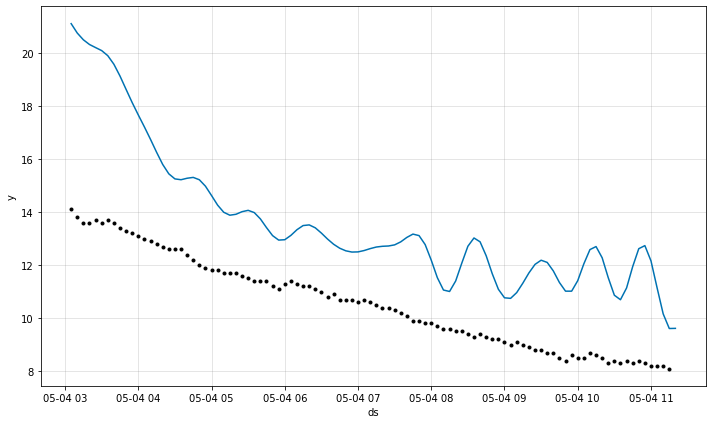

In [8]:
f = m.plot(forecast.iloc[-100:])